# Exploratory data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf
#import pandas_datareader as pdr

In [2]:
sp500 = pd.read_excel('data/sp500_companies_2024_07_04.xlsx')
display(sp500.head())

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date added
0,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26
2,ABT,Abbott,Health Care,Health Care Equipment,1957-03-04
3,ABBV,AbbVie,Health Care,Biotechnology,2012-12-31
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,2011-07-06


In [3]:
sp500['Date added'] = pd.to_datetime(sp500['Date added'], format='%Y-%m-%d')

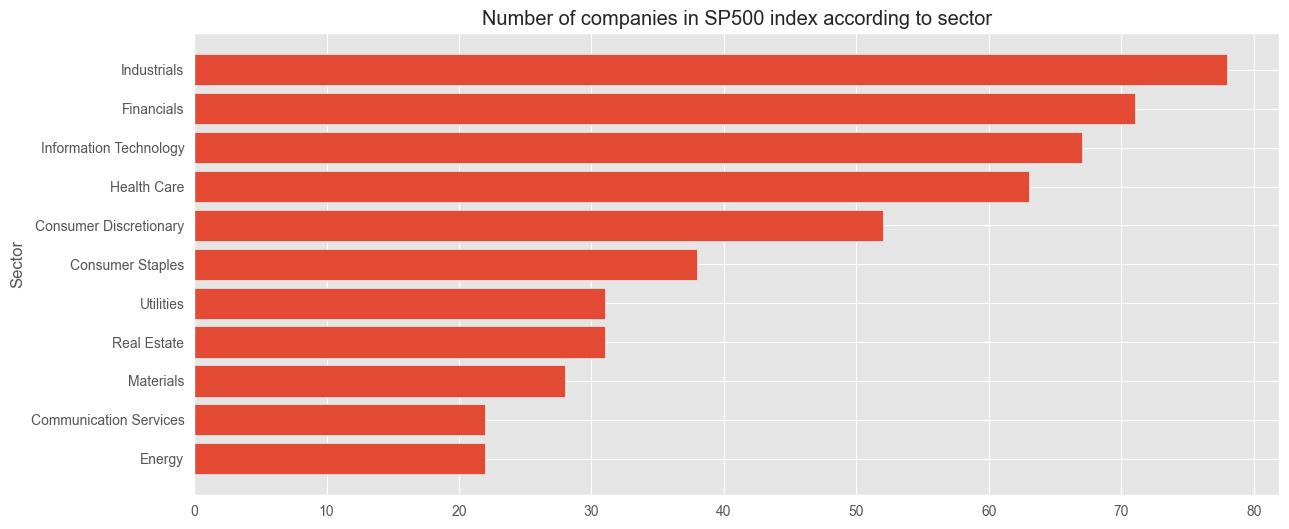

In [4]:
sectors = sp500['GICS Sector'].value_counts()

plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.barh(sectors.index[::-1], sectors.values[::-1])
ax1.set_title('Number of companies in SP500 index according to sector')
ax1.set_ylabel('Sector')
plt.show()

In [5]:
# Add market capitalization
market_capitalization = []
for symbol in sp500['Symbol']:
    stock = yf.Ticker(symbol)
    try:
        market_capitalization.append(stock.fast_info['marketCap'])
    except:
        market_capitalization.append(np.nan)
sp500['Market Capitalization'] = market_capitalization

GEV: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']
SOLV: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']


In [6]:
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date added,Market Capitalization
0,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04,5.595863e+10
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26,1.165880e+10
2,ABT,Abbott,Health Care,Health Care Equipment,1957-03-04,1.790253e+11
3,ABBV,AbbVie,Health Care,Biotechnology,2012-12-31,2.932580e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,2011-07-06,1.884727e+11
...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,2011-11-01,3.209029e+10
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,1997-10-06,3.619816e+10
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,2019-12-23,1.599658e+10
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,2001-08-07,2.199634e+10


In [7]:
persistent_companies = sp500[sp500['Date added'] <= datetime.datetime(1989, 1, 1)]
print(f'Number of persistent companies in SP500: {len(persistent_companies)}')

Number of persistent companies in SP500: 118


In [8]:
persistent_companies_sorted = persistent_companies.sort_values(by=['Market Capitalization', 'GICS Sector'],
                                                               ascending=False, ignore_index=True)

In [9]:
sectors = persistent_companies_sorted['GICS Sector'].unique()
selected_stocks = []
for s in sectors:
    selected_stocks.append(persistent_companies_sorted[persistent_companies_sorted['GICS Sector'] == s].iloc[0, :])
selected_stocks = pd.DataFrame.from_records(selected_stocks)

In [10]:
display(selected_stocks)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date added,Market Capitalization
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",1982-11-30,3.453699e+12
1,LLY,Eli Lilly and Company,Health Care,Pharmaceuticals,1970-12-31,8.201159e+11
2,JPM,JPMorgan Chase,Financials,Diversified Banks,1975-06-30,5.886924e+11
3,WMT,Walmart,Consumer Staples,Consumer Staples Merchandise Retail,1982-08-31,5.541597e+11
4,XOM,ExxonMobil,Energy,Integrated Oil & Gas,1957-03-04,5.105079e+11
5,HD,Home Depot (The),Consumer Discretionary,Home Improvement Retail,1988-03-31,3.317444e+11
6,DIS,Walt Disney Company (The),Communication Services,Movies & Entertainment,1976-06-30,1.781057e+11
7,GE,GE Aerospace,Industrials,Aerospace & Defense,1957-03-04,1.750829e+11
8,NEE,NextEra Energy,Utilities,Multi-Utilities,1976-06-30,1.479467e+11
9,SHW,Sherwin-Williams,Materials,Specialty Chemicals,1964-06-30,7.506090e+10


In [11]:
# Save data
selected_stocks.to_excel('data/selected_stocks.xlsx', index=False)